In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from itertools import product


In [3]:
wrk = Path("../Resources/average_hours_worked_per_week.csv")
House_hold = Path("../Resources/Household.income 2.csv")
suicide = Path("../Resources/suicide_rate.csv")

wrk_df = pd.read_csv(wrk, encoding="UTF-8")
House_hold_df = pd.read_csv(House_hold, encoding="UTF-8")
suicide_df = pd.read_csv(suicide, encoding="UTF-8")
#wrk_df.head()
House_hold_df.head()
#Annual_hours_df.head()

,State,2022,Unnamed: 2,2021,Unnamed: 4,2020 (41),Unnamed: 6,2019,Unnamed: 8,2018,...,1988,Unnamed: 74,1987 (21),Unnamed: 76,1986,Unnamed: 78,1985 (20),Unnamed: 80,1984 (19),Unnamed: 82
0,NaN,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,...,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error
1,United States,74580.00,588.00,70780.00,368.00,68010.00,535.00,68700.00,550.00,63180.00,...,27230.00,139.00,26060.00,127.00,24900.00,129.00,23620.00,128.00,22420.00,102.00
2,Alabama,59910.00,1934.00,56930.00,2294.00,54690.00,2563.00,56200.00,2512.00,49940.00,...,19950.00,912.00,19730.00,1147.00,19130.00,885.00,18330.00,760.00,17310.00,605.00
3,Alaska,89740.00,4842.00,81130.00,3967.00,74750.00,3557.00,78390.00,6685.00,68730.00,...,33100.00,1183.00,33230.00,1497.00,31360.00,1017.00,34780.00,1089.00,32360.00,1473.00
4,Arizona,73450.00,4123.00,70820.00,3394.00,67090.00,3409.00,70670.00,3391.00,62280.00,...,26440.00,843.00,26750.00,892.00,25500.00,718.00,23880.00,744.00,21430.00,609.00


In [6]:

# Selecting specific columns "Country", "Time", and "Value"
clean_wrk_df = wrk_df.iloc[11:16] 
clean_house_hold_df = House_hold_df[["State","2020 (41)","2019","2018","2017","2016"]]
columns = "State","2020","2019","2018","2017","2016"
clean_house_hold_df.columns = columns

clean_house_hold_df = clean_house_hold_df.drop(clean_house_hold_df.index[0])
clean_house_hold_df = clean_house_hold_df.drop(clean_house_hold_df.index[0])
clean_house_hold_df = clean_house_hold_df.set_index(clean_house_hold_df.columns[0])
clean_house_hold_df[["2020","2019","2018","2017","2016"]] = clean_house_hold_df[["2020","2019","2018","2017","2016"]].astype(float)
column = [["2020","2019","2018","2017","2016"]]

clean_house_hold_df.head()

#clean_house_hold_df = clean_house_hold_df.set_index(clean_house_hold_df.columns[0])
# Displaying the new DataFrame
clean_wrk_df.tail()
clean_house_hold_df.head()


,2020,2019,2018,2017,2016
State,,,,,
Alabama,54690.0,56200.0,49940.0,51110.0,47220.0
Alaska,74750.0,78390.0,68730.0,72230.0,75720.0
Arizona,67090.0,70670.0,62280.0,61130.0,57100.0
Arkansas,50780.0,54540.0,49780.0,48830.0,45910.0
California,77650.0,78110.0,70490.0,69760.0,66640.0


In [7]:
print(clean_wrk_df.columns)


Index(['U.S. average hours worked per week 2007-2022', 'Unnamed: 1'], dtype='object')


In [8]:


clean_wrk_df.columns = ["Year", "Average Weekly Worked Hours"]
clean_wrk_df = clean_wrk_df.reset_index()

clean_wrk_df


,index,Year,Average Weekly Worked Hours
0,11,2016,34.4
1,12,2017,34.4
2,13,2018,34.5
3,14,2019,34.4
4,15,2020,34.6


In [9]:
# Assuming 'column' is a 1D array or list containing the years
avg_hrs_wrk = pd.DataFrame({
    "Year": ["2016","2017", "2018", "2019", "2020"],
    "Average Household Income ($)": clean_wrk_df["Average Weekly Worked Hours"]
})


In [11]:
average_income_16 = float("{:.2f}".format(clean_house_hold_df['2016'].mean()))
average_income_20 = float("{:.2f}".format(clean_house_hold_df['2020'].mean()))
average_income_19 = float("{:.2f}".format(clean_house_hold_df['2019'].mean()))
average_income_18 = float("{:.2f}".format(clean_house_hold_df['2018'].mean()))
average_income_17 = float("{:.2f}".format(clean_house_hold_df['2017'].mean()))


In [12]:
print(type(average_income_16))
print(type(average_income_20))
print(type(average_income_19))
print(type(average_income_18))
print(type(average_income_17))


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [13]:
us_average_income = pd.DataFrame({
    "Year": ["2016","2017", "2018", "2019", "2020"],
    "Average Household Income ($)": [average_income_16, average_income_17, average_income_18, average_income_19, average_income_20]
})

In [14]:
us_average_income

,Year,Average Household Income ($)
0,2016,59179.61
1,2017,61640.59
2,2018,64411.18
3,2019,69720.59
4,2020,68660.39


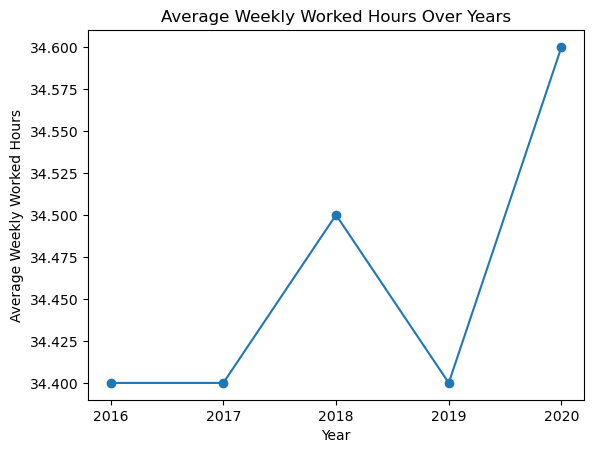

In [15]:
# Assuming clean_wrk_df['Year'] and clean_wrk_df['Average Weekly Worked Hours'] are DataFrame columns
# Convert the numpy array to a list
year_list = clean_wrk_df['Year']

# Plot the data
plt.plot(avg_hrs_wrk["Year"], avg_hrs_wrk["Average Household Income ($)"], marker='o', linestyle='-')

# Set y-axis limits and ticks


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Weekly Worked Hours')
plt.title('Average Weekly Worked Hours Over Years')

# Show the plot
plt.show()

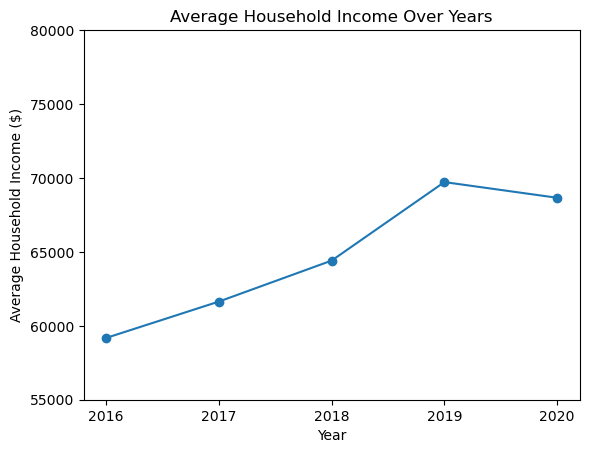

In [16]:
# Plot the data
plt.plot(us_average_income['Year'], us_average_income['Average Household Income ($)'], marker='o', linestyle='-')

# Set y-axis limits and ticks
plt.ylim(55000, 80000)
plt.yticks(range(55000, 80001, 5000))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Household Income ($)')
plt.title('Average Household Income Over Years')

# Show the plot
plt.show()

In [17]:
print(suicide_df.columns)
suicide_df



Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2017,13.6,NaN
1,AUS,SUICIDE,TOT,100000PER,A,2018,13.0,NaN
2,AUS,SUICIDE,TOT,100000PER,A,2019,13.5,NaN
3,AUS,SUICIDE,TOT,100000PER,A,2020,12.4,NaN
4,AUS,SUICIDE,TOT,100000PER,A,2021,12.4,NaN
...,...,...,...,...,...,...,...,...
153,PER,SUICIDE,TOT,100000PER,A,2019,1.7,NaN
154,PER,SUICIDE,TOT,100000PER,A,2020,1.8,NaN
155,ROU,SUICIDE,TOT,100000PER,A,2017,9.4,NaN
156,ROU,SUICIDE,TOT,100000PER,A,2018,9.5,NaN


In [18]:
suicide_df = suicide_df[["LOCATION", "INDICATOR", "SUBJECT", "MEASURE", "TIME", "Value"]]
suicide_df.columns = ["Country","Indicator", "Subject","Measure", "Year", "Value"]
suicide_df.head()

,Country,Indicator,Subject,Measure,Year,Value
0,AUS,SUICIDE,TOT,100000PER,2017,13.6
1,AUS,SUICIDE,TOT,100000PER,2018,13.0
2,AUS,SUICIDE,TOT,100000PER,2019,13.5
3,AUS,SUICIDE,TOT,100000PER,2020,12.4
4,AUS,SUICIDE,TOT,100000PER,2021,12.4


In [19]:
usa_suicide_rates = suicide_df[suicide_df["Country"] == "USA"]
usa_suicide_rates.reset_index(drop=True, inplace=True)

usa_suicide_rates.head()

,Country,Indicator,Subject,Measure,Year,Value
0,USA,SUICIDE,TOT,100000PER,2017,14.8
1,USA,SUICIDE,TOT,100000PER,2018,15.0
2,USA,SUICIDE,TOT,100000PER,2019,14.7
3,USA,SUICIDE,TOT,100000PER,2020,14.1


In [20]:
# Fill null values with zero
suicide_df_filled = suicide_df.fillna(0)

suicide_df = suicide_df.groupby(["Year","Country"])
suicide_df.head()

,Country,Indicator,Subject,Measure,Year,Value
0,AUS,SUICIDE,TOT,100000PER,2017,13.6
1,AUS,SUICIDE,TOT,100000PER,2018,13.0
2,AUS,SUICIDE,TOT,100000PER,2019,13.5
3,AUS,SUICIDE,TOT,100000PER,2020,12.4
4,AUS,SUICIDE,TOT,100000PER,2021,12.4
...,...,...,...,...,...,...
153,PER,SUICIDE,TOT,100000PER,2019,1.7
154,PER,SUICIDE,TOT,100000PER,2020,1.8
155,ROU,SUICIDE,TOT,100000PER,2017,9.4
156,ROU,SUICIDE,TOT,100000PER,2018,9.5


In [21]:
# Check the data types of columns in suicide_df
suicide_df_dtypes = suicide_df.dtypes
print(suicide_df_dtypes)


             Country Indicator Subject Measure   Year    Value
Year Country                                                  
2017 ARG      object    object  object  object  int64  float64
     AUS      object    object  object  object  int64  float64
     AUT      object    object  object  object  int64  float64
     BEL      object    object  object  object  int64  float64
     BGR      object    object  object  object  int64  float64
...              ...       ...     ...     ...    ...      ...
2021 EST      object    object  object  object  int64  float64
     ISL      object    object  object  object  int64  float64
     LTU      object    object  object  object  int64  float64
     LUX      object    object  object  object  int64  float64
     LVA      object    object  object  object  int64  float64

[158 rows x 6 columns]


TypeError: 'bool' object is not callable

In [ ]:

# Collapse the grouped DataFrame by applying an aggregation function
# For example, you can calculate the mean or sum of numerical columns
suicide_df = suicide_df.mean()  # Assuming you want to calculate the mean

# Now, reset the index to convert the grouped DataFrame to a regular DataFrame
suicide_df = suicide_df.reset_index()

# Now you can proceed with the rest of the code as before
all_countries = suicide_df["Country"].unique()
all_years = suicide_df["Year"].unique()
combinations = list(product(all_countries, all_years))
full_index_df = pd.DataFrame(combinations, columns=["Country", "Year"])
merged_df = full_index_df.merge(suicide_df, on=["Country", "Year"], how="left")
